<a href="https://colab.research.google.com/github/Yehezk34/DataScience/blob/main/GoogleApps_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

import plotly.graph_objs as go
import plotly

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

In [7]:
apps_with_duplicates = pd.read_csv('apps.csv')
apps = apps_with_duplicates.drop_duplicates()

print('Total number of apps in the dataset = ', apps.shape)
n = 5
apps.sample(n)

Total number of apps in the dataset =  (9659, 14)


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2853,3610,Johny Johny Yes Papa Nursery Rhyme - offline V...,PARENTING,4.5,806,11M,"500,000+",Free,0,Everyone,Parenting,"August 4, 2018",4.2,4.0.3 and up
266,302,MangaToon - Comics updated Daily,COMICS,3.9,834,15M,"50,000+",Free,0,Mature 17+,Comics,"August 1, 2018",1.0.8,4.1 and up
5933,6969,Tiny Call Confirm,COMMUNICATION,4.1,22782,0.351,"1,000,000+",Free,0,Everyone,Communication,"March 25, 2015",4.2.0,2.2 and up
1628,2081,Fuzzy Seasons: Animal Forest,FAMILY,4.8,12137,63M,"100,000+",Free,0,Everyone 10+,Simulation;Pretend Play,"August 6, 2018",149,4.1 and up
200,200,SuperLivePro,BUSINESS,4.3,46353,21M,"1,000,000+",Free,0,Everyone,Business,"April 13, 2016",2.8,1.5 and up


In [8]:
chars_to_remove = ['+', ',', 'M', '$']
cols_to_clean = ['Installs', 'Size', 'Price']

for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col])

In [9]:
plotly.offline.init_notebook_mode(connected=True)

num_categories = apps['Category'].nunique()
print('Number of categories = ', num_categories)

num_apps_in_category = apps['Category'].value_counts().sort_values(ascending=False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


In [10]:
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

data = [go.Histogram(
        x = apps['Rating'],
        xbins = {'start': 1, 'size': 0.1, 'end' : 5}
)]

layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


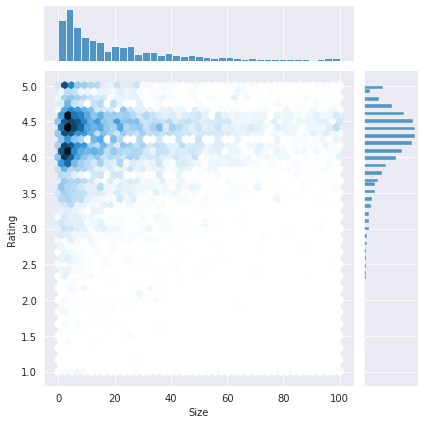

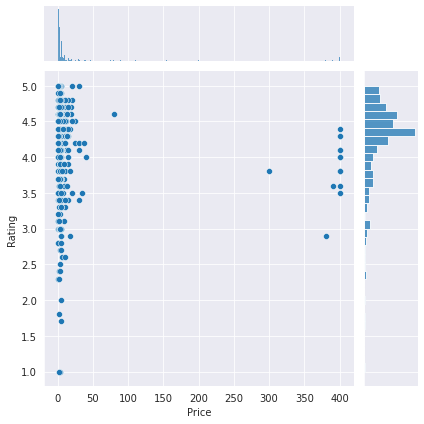

In [11]:
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()
plt1 = sns.jointplot(x = apps['Size'], y = apps['Rating'], kind = 'hex')
paid_apps = apps[apps['Type'] == 'Paid']

plt2 = sns.jointplot(x = 'Price', y = 'Rating', data = paid_apps)

,App,Category,Price
3327,most expensive app (H),FAMILY,399.99
3465,💎 I'm rich,LIFESTYLE,399.99
3469,I'm Rich - Trump Edition,LIFESTYLE,400.00
4396,I am rich,LIFESTYLE,399.99
4398,I am Rich Plus,FAMILY,399.99
4399,I am rich VIP,LIFESTYLE,299.99
4400,I Am Rich Premium,FINANCE,399.99
4401,I am extremely Rich,LIFESTYLE,379.99
4402,I am Rich!,FINANCE,399.99
4403,I am rich(premium),FINANCE,399.99


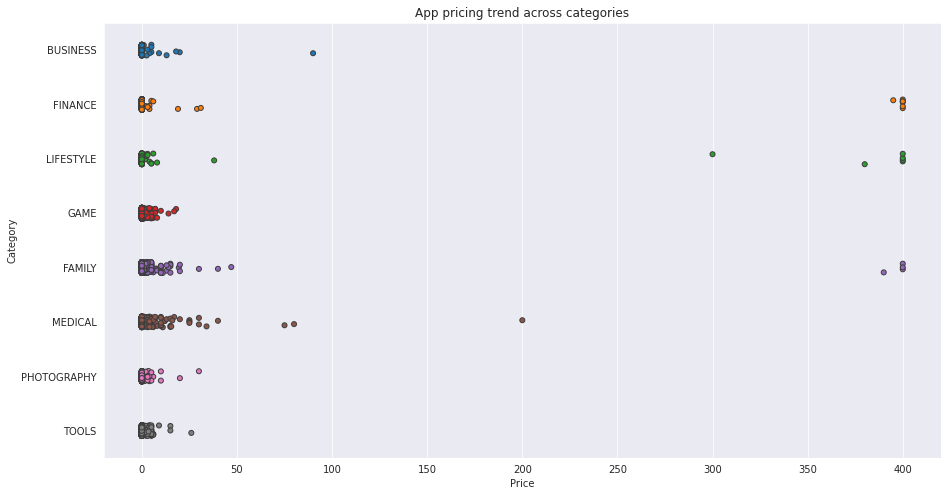

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Choose which is popular!
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

ax = sns.stripplot(x='Price', y='Category', data=popular_app_cats,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Category, Name and Price of apps priced above $200
apps_above_200 = apps[['App', 'Category', 'Price']].loc[apps['Price'] > 200]
apps_above_200

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

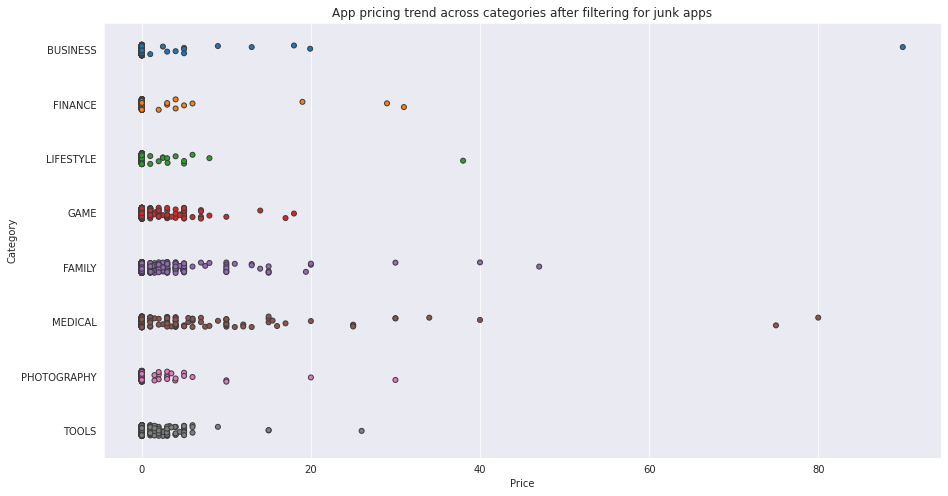

In [13]:
apps_under_100 = popular_app_cats.loc[popular_app_cats['Price'] <=100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

In [14]:
trace0 = go.Box(
    y=apps['Installs'][apps['Type'] == 'Paid'],
    name = 'Paid'
)

trace1 = go.Box(
    y=apps['Installs'][apps['Type'] == 'Free'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
47049,3130,Goibibo - Flight Hotel Bus Car IRCTC Booking App,TRAVEL_AND_LOCAL,4.3,459851,NaN,10000000,Free,0.0,Everyone,Travel & Local,"August 1, 2018",3.9.7,4.3 and up,It's fantastic,Positive,0.400000,0.900000
52907,3451,"All-In-One Toolbox: Cleaner, Booster, App Manager",PRODUCTIVITY,4.7,536926,NaN,10000000,Free,0.0,Everyone,Productivity,"August 5, 2018",Varies with device,Varies with device,The pop-up ads reminders annoying distracting....,Negative,-0.400000,0.825000
47406,3151,2GIS: directory & navigator,TRAVEL_AND_LOCAL,4.5,768833,NaN,50000000,Free,0.0,Everyone,Travel & Local,"July 30, 2018",Varies with device,Varies with device,"Previously, the application was eating less ba...",Negative,-0.057778,0.257778
18130,1306,"Fabulous: Motivate Me! Meditate, Relax, Sleep",HEALTH_AND_FITNESS,4.6,205299,31.0,5000000,Free,0.0,Everyone,Health & Fitness,"July 16, 2018",3.48,4.1 and up,"The great But subscription way expensive,as I ...",Positive,0.222656,0.787500
44065,2970,Football Live Scores,SPORTS,4.5,107724,6.5,5000000,Free,0.0,Everyone,Sports,"July 31, 2018",1004.0,4.0 and up,The UI far best enjoyable sections app. Only g...,Positive,0.360000,0.620000


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

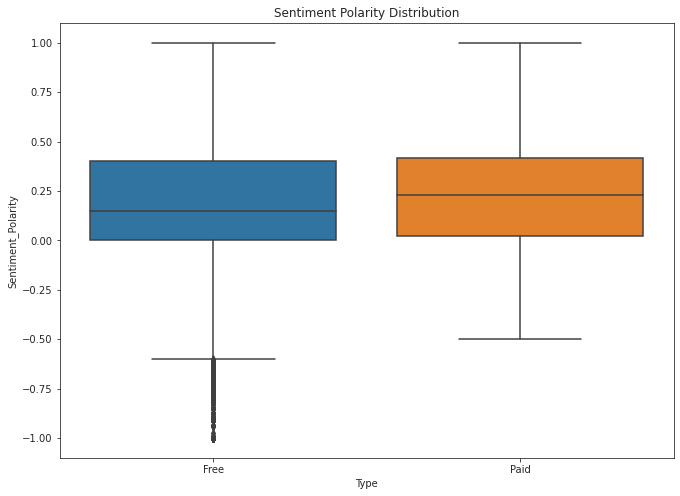

In [16]:
reviews_df = pd.read_csv('user_reviews.csv')

merged_df = pd.merge(apps, reviews_df, on = 'App', how = "inner")
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])
display(merged_df.sample(5))
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

Coded by Yehezkiel Tato